In [1]:
# path to user functions
import sys  
sys.path.append('../Src/')

from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import importlib 

# import user functions
import UserUtilityFunctions as uf
import UserStatisticalFunctions as usf
import UserVisualization as uv
import UserImputeFunctions as ui

# set seaborn theme
sns.set_theme()

# initializing variables
REMOVE = '** REMOVE ** ML Linear Regression'
RANDOM_STATE = 1776

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# initialize DataFrame
df_new = pd.DataFrame(columns=['column'])

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [2]:
# import data
df = pd.read_pickle("../Data/Heart_ML_DropNaNs.pkl")
df_label = pd.read_pickle("../Data/Label_ML.pkl")
df_can = pd.read_pickle("../Data/CAN_ML.pkl")
df_don = pd.read_pickle("../Data/DON_ML.pkl")
df_both = pd.read_pickle("../Data/BOTH_ML.pkl")
df_nominal = pd.read_pickle("../Data/Nominal_ML.pkl")
df_ordinal = pd.read_pickle("../Data/Ordinal_ML.pkl")
df_numeric = pd.read_pickle("../Data/Numeric_ML.pkl")
df_object = pd.read_pickle("../Data/Object_ML.pkl")
df_date = pd.read_pickle("../Data/Date_ML.pkl")
df_dict = pd.read_pickle("../Data/Dictionary_ML.pkl")
df_drop = pd.read_pickle("../Data/Drop_ML.pkl")
df_unknown = pd.read_pickle("../Data/Unknown_ML.pkl")
df_new = pd.read_pickle("../Data/New_ML.pkl")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

### Feature Information

In [3]:
print(f"Heart Dataset Rows: {df.shape[0]:,} & Columns: {df.shape[1]:,}")
print(f"Label Features: {df_label.shape[0]:,}")
print(f"Candidate Features: {df_can.shape[0]:,}")
print(f"Donor Features: {df_don.shape[0]:,}")
print(f"Date Features: {df_date.shape[0]:,}")
print(f"Both Features: {df_both.shape[0]:,}")
print(f"Object Features: {df_object.shape[0]:,}")
print(f"Numeric Features: {df_numeric.shape[0]:,}")
print(f"Ordinal Features: {df_ordinal.shape[0]:,}")
print(f"Nominal Features: {df_nominal.shape[0]:,}")
print(f"Drop Features: {df_drop.shape[0]:,}")
print(f"Unknown Features: {df_unknown.shape[0]:,}")
print(f"New Features: {df_new.shape[0]:,}")

Heart Dataset Rows: 9,850 & Columns: 220
Label Features: 1
Candidate Features: 114
Donor Features: 88
Date Features: 0
Both Features: 21
Object Features: 0
Numeric Features: 42
Ordinal Features: 20
Nominal Features: 157
Drop Features: 0
Unknown Features: 0
New Features: 29


### User Function(s)

In [4]:
def getFeatureList(data, string):
    # initialize features and sort them alphabetically
    features = sorted(data.columns[data.columns.str.contains(string)].tolist())

    # display
    print(data[features].describe(include='all').T.to_string())
    print("\n:::: NaN Count:")
    print(data[features].isna().sum().sort_index().to_string())

    return features


#### Remove NaNs

In [5]:
# shape
print(f"Total Number of Rows: {df.shape[0]} & Total Number of Features {df.shape[1]}")

Total Number of Rows: 9850 & Total Number of Features 220


#### Examine NaNs

In [6]:
# get NaNs
NaNsDF = uf.percentageNull(df)

# display NaNs
NaNsDF

,percentage,NaNCount


#### Describe

In [7]:
df[df_can.column.to_list()].describe().T

,count,mean,std,min,25%,50%,75%,max
BloodUreaNitrogenLevel_DON,9850.0,26.676726,2.137065e+01,1.450000e+00,1.400000e+01,2.000000e+01,3.200000e+01,2.500000e+02
HemodynamicsRegistration_CO_CAN,9850.0,4.220457,1.295280e+00,4.500000e-01,3.300000e+00,4.100000e+00,4.950000e+00,1.353000e+01
HemodynamicsTransplant_CO_CAN,9850.0,4.453218,1.403848e+00,2.000000e-01,3.500000e+00,4.300000e+00,5.210000e+00,1.500000e+01
TotalDayWaitList_CAN,9850.0,145.834619,2.266264e+02,0.000000e+00,1.400000e+01,5.100000e+01,1.780000e+02,2.012000e+03
PanelReactiveAntibody_CPRA_Interaction_CAN,9850.0,712.905233,1.914311e+03,1.000000e-10,1.000000e-10,1.000000e-10,8.075024e+01,1.000000e+04
PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN,9850.0,3.628122,1.162356e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02
PanelReactiveAntibody_CPRA_Addition_CAN,9850.0,25.840711,4.829463e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01,2.000000e+02
Creatinine_Interaction_CAN,9850.0,2.713977,9.738804e+00,2.940000e-02,9.600000e-01,1.437400e+00,2.210000e+00,5.105184e+02
Creatinine_Difference_RT_CAN,9850.0,0.007662,7.356478e-01,-2.230000e+01,-1.800000e-01,0.000000e+00,1.800000e-01,1.896000e+01
Creatinine_Addition_CAN,9850.0,2.785284,1.907786e+00,3.500000e-01,1.980000e+00,2.400000e+00,3.000000e+00,4.556000e+01


In [8]:
df[df_don.column.to_list()].describe().T

,count,mean,std,min,25%,50%,75%,max
OrganRecovery_PCO2_DON,9850.0,39.163600,6.957478,17.00,34.80,38.60,43.00,106.00
DistanceFromDonorHospitaltoTXCenter,9850.0,222.027107,227.984995,0.00,33.00,161.00,350.00,2215.00
Hematocrit_DON,9850.0,28.149137,4.900109,2.50,24.80,27.60,31.00,60.60
IschemicTimeHour_DON,9850.0,3.268294,1.104085,0.30,2.60,3.30,3.90,12.00
BloodPH_DON,9850.0,7.417995,0.068044,5.57,7.38,7.42,7.46,7.93
LV_EjectionFractionPercent_DON,9850.0,61.618470,6.596256,10.00,56.00,60.00,65.00,91.00
LungPO2_DON,9850.0,280.862944,160.309480,12.00,129.00,260.85,427.00,668.00
LungPO2_FIO2_DON,9850.0,82.265787,25.318153,10.00,60.00,100.00,100.00,100.00
Level_SGOT_Difference_AltAst_DON,9850.0,20.925442,504.639591,-7648.00,-20.00,-1.00,22.00,43967.00
Level_SGOT_Addition_DON,9850.0,224.557807,726.265872,9.00,54.00,94.00,183.00,44267.00


In [9]:
df[df_ordinal.column.to_list()].describe().T

,count,unique,top,freq
PreviousTransplantNumber_CAN,9850,3,0,9563
EducationLevel_CAN,9850,7,HIGH SCHOOL (9-12) or GED,3571
FunctionalStatusRegistration_CAN,9850,18,"20% - Very sick, hospitalization necessary: active treatment necessary",2188
FunctionalStatusTransplant_CAN,9850,11,"20% - Very sick, hospitalization necessary: active treatment necessary",3133
DiabetesHistory_DON,9850,6,No,9410
CigaretteAbstinence_CAN,9850,10,Missing,5607
AntigenDQ1_CAN,9850,24,0,5751
AntigenDQ2_CAN,9850,25,0,6179
MedicalConditionTransplant_CAN,9850,3,Not Hospitalized,4321
TransfusionNumber_DON,9850,4,NONE,5050


In [10]:
df[df_nominal.column.to_list()].describe().T

,count,unique,top,freq
BloodGroup_CAN,9850,8,A,3960
BloodGroup_DON,9850,8,O,4859
BloodGroupMatchLevel,9850,3,Identical,8415
InotropicAgent_DON,9850,7,Missing,6446
HeavyAlcoholUse_DON,9850,3,No,7850
MismatchLevel_AMIS,9850,4,2,4741
MismatchLevel_HLMIS,9850,8,5,3433
MismatchLevel_BMIS,9850,4,2,6633
MismatchLevel_DRMIS,9850,4,2,5093
AntiHypertensive_DON,9850,2,No,6393


In [11]:
df[df_numeric.column.to_list()].describe().T

,count,mean,std,min,25%,50%,75%,max
TransplantSurvivalDay,9850.0,730.183959,5.433215e+02,0.000000e+00,2.852500e+02,7.150000e+02,1.105000e+03,2.101000e+03
BloodUreaNitrogenLevel_DON,9850.0,26.676726,2.137065e+01,1.450000e+00,1.400000e+01,2.000000e+01,3.200000e+01,2.500000e+02
HemodynamicsRegistration_CO_CAN,9850.0,4.220457,1.295280e+00,4.500000e-01,3.300000e+00,4.100000e+00,4.950000e+00,1.353000e+01
HemodynamicsTransplant_CO_CAN,9850.0,4.453218,1.403848e+00,2.000000e-01,3.500000e+00,4.300000e+00,5.210000e+00,1.500000e+01
TotalDayWaitList_CAN,9850.0,145.834619,2.266264e+02,0.000000e+00,1.400000e+01,5.100000e+01,1.780000e+02,2.012000e+03
OrganRecovery_PCO2_DON,9850.0,39.163600,6.957478e+00,1.700000e+01,3.480000e+01,3.860000e+01,4.300000e+01,1.060000e+02
DistanceFromDonorHospitaltoTXCenter,9850.0,222.027107,2.279850e+02,0.000000e+00,3.300000e+01,1.610000e+02,3.500000e+02,2.215000e+03
Hematocrit_DON,9850.0,28.149137,4.900109e+00,2.500000e+00,2.480000e+01,2.760000e+01,3.100000e+01,6.060000e+01
IschemicTimeHour_DON,9850.0,3.268294,1.104085e+00,3.000000e-01,2.600000e+00,3.300000e+00,3.900000e+00,1.200000e+01
BloodPH_DON,9850.0,7.417995,6.804353e-02,5.570000e+00,7.380000e+00,7.420000e+00,7.460000e+00,7.930000e+00


In [12]:
df[df_both.column.to_list()].describe().T

,count,mean,std,min,25%,50%,75%,max
Age_Difference_CanDon,9850.0,21.530660,15.376301,-35.000000,11.000000,22.000000,33.000000,60.000000
Age_Addition,9850.0,86.382640,17.559023,26.000000,76.000000,87.000000,98.000000,137.000000
BMI_Difference_CanDon,9850.0,-0.064205,7.000128,-42.788380,-4.001791,0.574478,4.598691,22.206122
BMI_Addition,9850.0,55.430175,8.763950,32.503121,49.222959,54.607685,60.779593,110.418750
Creatinine_Interaction_CAN,9850.0,2.713977,9.738804,0.029400,0.960000,1.437400,2.210000,510.518400
Creatinine_Difference_RT_CAN,9850.0,0.007662,0.735648,-22.300000,-0.180000,0.000000,0.180000,18.960000
Creatinine_Addition_CAN,9850.0,2.785284,1.907786,0.350000,1.980000,2.400000,3.000000,45.560000
HeightCm_Difference_CanDon,9850.0,-0.226457,9.589461,-50.800000,-6.400000,0.000000,6.300000,41.000000
HeightCm_Addition,9850.0,347.419472,17.073923,284.000000,335.300000,348.300000,360.300000,404.100000
Level_SGOT_Difference_AltAst_DON,9850.0,20.925442,504.639591,-7648.000000,-20.000000,-1.000000,22.000000,43967.000000


In [13]:
df[df_new.column.to_list()].describe().T

,count,mean,std,min,25%,50%,75%,max
Age_Difference_CanDon,9850.0,21.530660,1.537630e+01,-3.500000e+01,1.100000e+01,2.200000e+01,3.300000e+01,6.000000e+01
Age_Addition,9850.0,86.382640,1.755902e+01,2.600000e+01,7.600000e+01,8.700000e+01,9.800000e+01,1.370000e+02
BMI_Difference_CanDon,9850.0,-0.064205,7.000128e+00,-4.278838e+01,-4.001791e+00,5.744777e-01,4.598691e+00,2.220612e+01
BMI_Addition,9850.0,55.430175,8.763950e+00,3.250312e+01,4.922296e+01,5.460769e+01,6.077959e+01,1.104188e+02
PanelReactiveAntibody_CPRA_Interaction_CAN,9850.0,712.905233,1.914311e+03,1.000000e-10,1.000000e-10,1.000000e-10,8.075024e+01,1.000000e+04
PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN,9850.0,3.628122,1.162356e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02
PanelReactiveAntibody_CPRA_Addition_CAN,9850.0,25.840711,4.829463e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01,2.000000e+02
Creatinine_Interaction_CAN,9850.0,2.713977,9.738804e+00,2.940000e-02,9.600000e-01,1.437400e+00,2.210000e+00,5.105184e+02
Creatinine_Difference_RT_CAN,9850.0,0.007662,7.356478e-01,-2.230000e+01,-1.800000e-01,0.000000e+00,1.800000e-01,1.896000e+01
Creatinine_Addition_CAN,9850.0,2.785284,1.907786e+00,3.500000e-01,1.980000e+00,2.400000e+00,3.000000e+00,4.556000e+01


### Wrangle

In [14]:
print(sorted([df_new.column.to_list()]))

[['Age_Difference_CanDon', 'Age_Addition', 'BMI_Difference_CanDon', 'BMI_Addition', 'PanelReactiveAntibody_CPRA_Interaction_CAN', 'PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN', 'PanelReactiveAntibody_CPRA_Addition_CAN', 'Creatinine_Interaction_CAN', 'Creatinine_Difference_RT_CAN', 'Creatinine_Addition_CAN', 'HeightCm_Difference_CanDon', 'HeightCm_Addition', 'HemodynamicsRegistration_Interaction_CAN', 'HemodynamicsRegistration_Addition_CAN', 'HemodynamicsTransplant_Interaction_CAN', 'HemodynamicsTransplant_Addition_CAN', 'Hemodynamics_Difference_CO_RT_CAN', 'Hemodynamics_Difference_PA_DIA_RT_CAN', 'Hemodynamics_Difference_PA_MN_RT_CAN', 'Hemodynamics_Difference_PCW_RT_CAN', 'Hemodynamics_Difference_SYS_RT_CAN', 'Hemodynamics_Interaction_Difference_CAN', 'Hemodynamics_Addition_Difference_CAN', 'Level_SGOT_Difference_AltAst_DON', 'Level_SGOT_Addition_DON', 'TotalBilirubin_Difference_CanDon', 'TotalBilirubin_Addition', 'WeightKg_Difference_CanDon', 'WeightKg_Addition']]


#### Age

In [15]:
# examine features
features = getFeatureList(df, 'Age_')

                        count      mean        std   min   25%   50%   75%    max
Age_Addition           9850.0  86.38264  17.559023  26.0  76.0  87.0  98.0  137.0
Age_Difference_CanDon  9850.0  21.53066  15.376301 -35.0  11.0  22.0  33.0   60.0

:::: NaN Count:
Age_Addition             0
Age_Difference_CanDon    0


In [16]:
df[features].corr()

,Age_Addition,Age_Difference_CanDon
Age_Addition,1.000000,0.156042
Age_Difference_CanDon,0.156042,1.000000


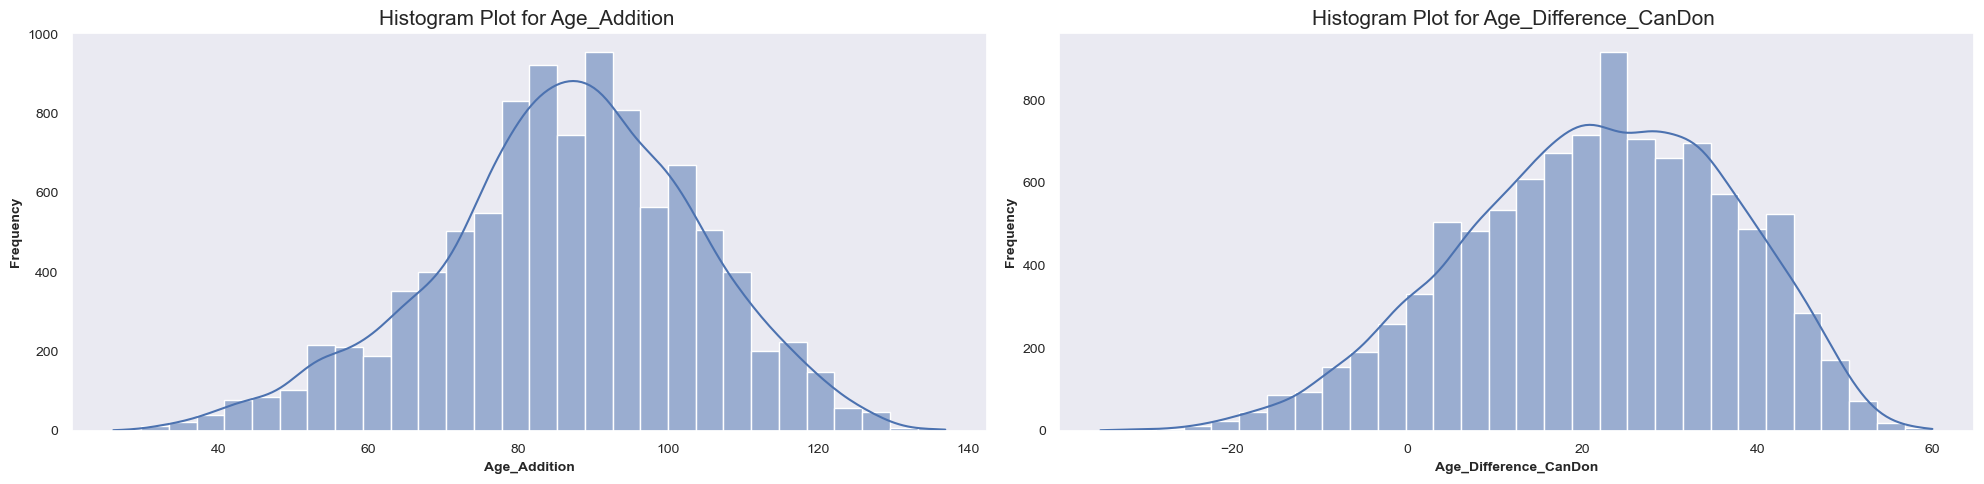

In [17]:
# plots
uv.histogramPlot(df, features, bins=30)

In [18]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def plotQQ(data, featuresList):
    # Calculate number of rows needed
    n_rows = (len(featuresList) + 1) // 2  # Round up division

    # Create subplots for each feature, two per row
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(16, 4*n_rows))
    fig.suptitle("Q-Q Plots", fontsize=16)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Create Q-Q plot for each feature
    for ax, feature in zip(axes, featuresList):
        stats.probplot(data[feature].dropna(), dist="norm", plot=ax)
        ax.set_title(f"Q-Q Plot: {feature}")

    # Remove any unused subplots
    for ax in axes[len(featuresList):]:
        ax.remove()

    plt.tight_layout()
    plt.show()

In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def plotQQ(data, featuresList):
    # Create subplots for each feature
    fig, axes = plt.subplots(nrows=len(featuresList), ncols=1, figsize=(8, 4*len(featuresList)))
    fig.suptitle("Q-Q Plots", fontsize=16)

    # If there's only one feature, axes will not be an array
    if len(featuresList) == 1:
        axes = [axes]

    # Create Q-Q plot for each feature
    for ax, feature in zip(axes, featuresList):
        stats.probplot(data[feature].dropna(), dist="norm", plot=ax)
        ax.set_title(f"Q-Q Plot: {feature}")

    plt.tight_layout()
    plt.show()

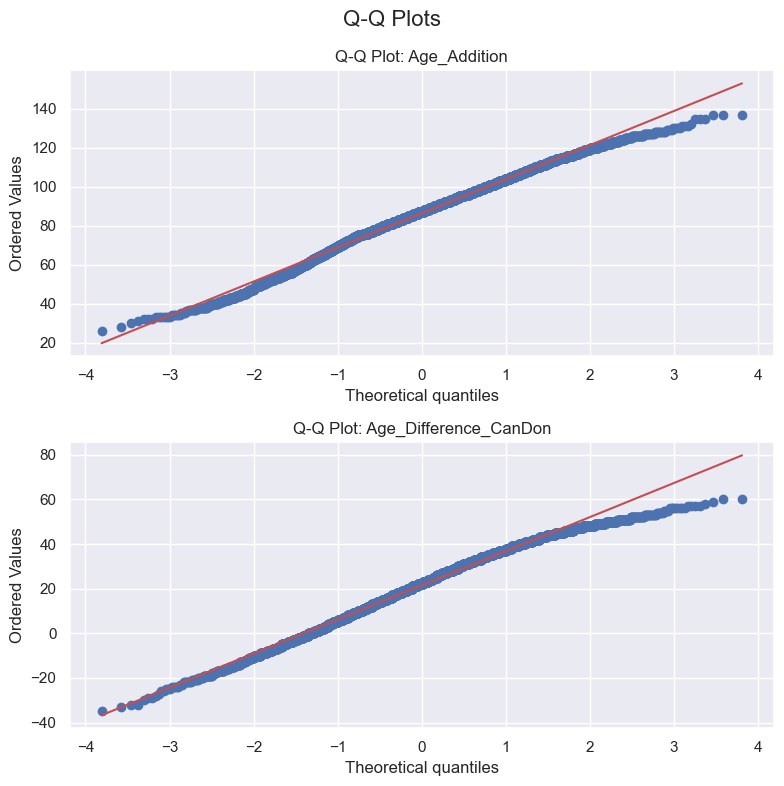

In [20]:
plotQQ(df,features)

In [21]:
import scipy.stats as stats

def plotQQ(data, featuresList):
    # Create Q-Q plot
    stats.probplot(df[featuresList], dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.show()

#### BMI

In [22]:
# examine features
features = getFeatureList(df, 'BMI_')

                        count       mean       std        min        25%        50%        75%         max
BMI_Addition           9850.0  55.430175  8.763950  32.503121  49.222959  54.607685  60.779593  110.418750
BMI_Difference_CanDon  9850.0  -0.064205  7.000128 -42.788380  -4.001791   0.574478   4.598691   22.206122

:::: NaN Count:
BMI_Addition             0
BMI_Difference_CanDon    0


In [23]:
df[features].corr()

,BMI_Addition,BMI_Difference_CanDon
BMI_Addition,1.000000,-0.247713
BMI_Difference_CanDon,-0.247713,1.000000


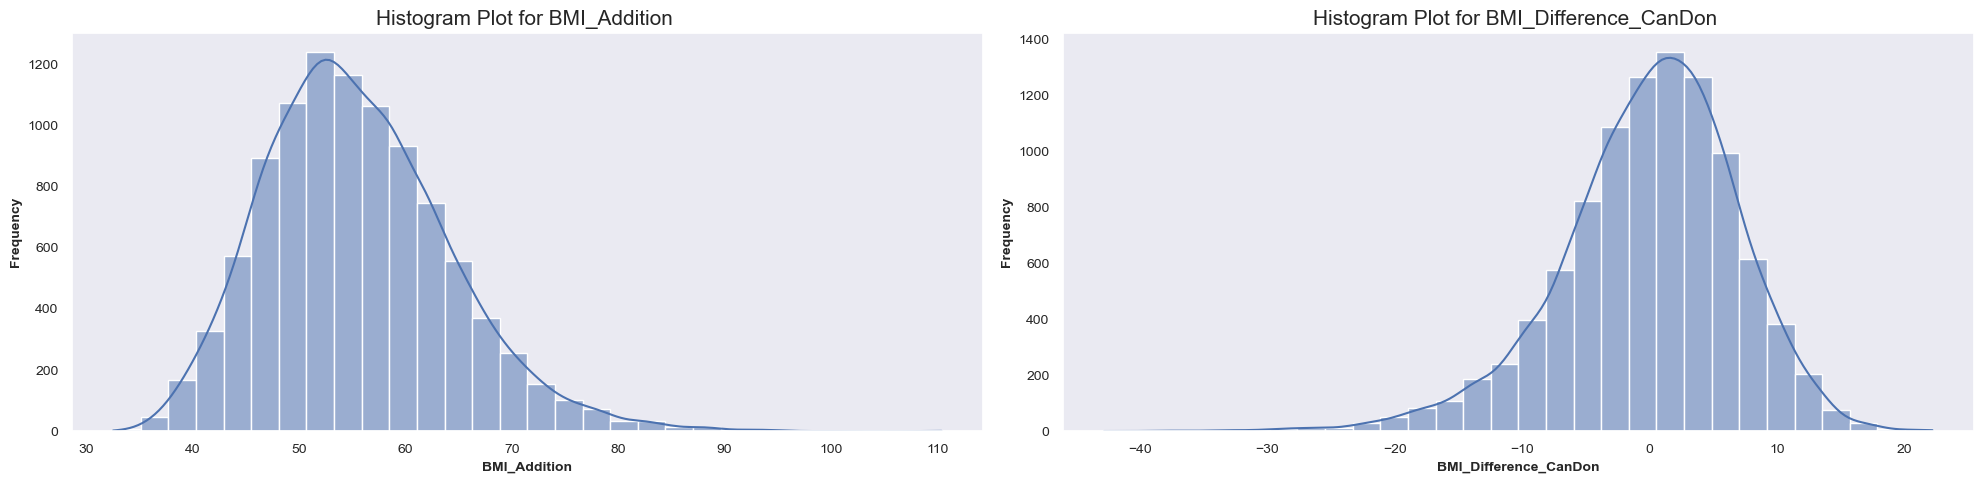

In [24]:
# plots
uv.histogramPlot(df, features, bins=30)

#### CPRA

In [25]:
# examine features
features = getFeatureList(df, 'CPRA')

                                                       count        mean          std           min           25%           50%       75%        max
PanelReactiveAntibody_CPRA_Addition_CAN               9850.0   25.840711    48.294628  0.000000e+00  0.000000e+00  0.000000e+00  29.00000    200.000
PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN  9850.0    3.628122    11.623562  0.000000e+00  0.000000e+00  0.000000e+00   0.00000    100.000
PanelReactiveAntibody_CPRA_Interaction_CAN            9850.0  712.905233  1914.310975  1.000000e-10  1.000000e-10  1.000000e-10  80.75024  10000.002

:::: NaN Count:
PanelReactiveAntibody_CPRA_Addition_CAN                 0
PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN    0
PanelReactiveAntibody_CPRA_Interaction_CAN              0


In [26]:
df[features].corr()

,PanelReactiveAntibody_CPRA_Addition_CAN,PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN,PanelReactiveAntibody_CPRA_Interaction_CAN
PanelReactiveAntibody_CPRA_Addition_CAN,1.000000,0.268885,0.933500
PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN,0.268885,1.000000,0.052507
PanelReactiveAntibody_CPRA_Interaction_CAN,0.933500,0.052507,1.000000


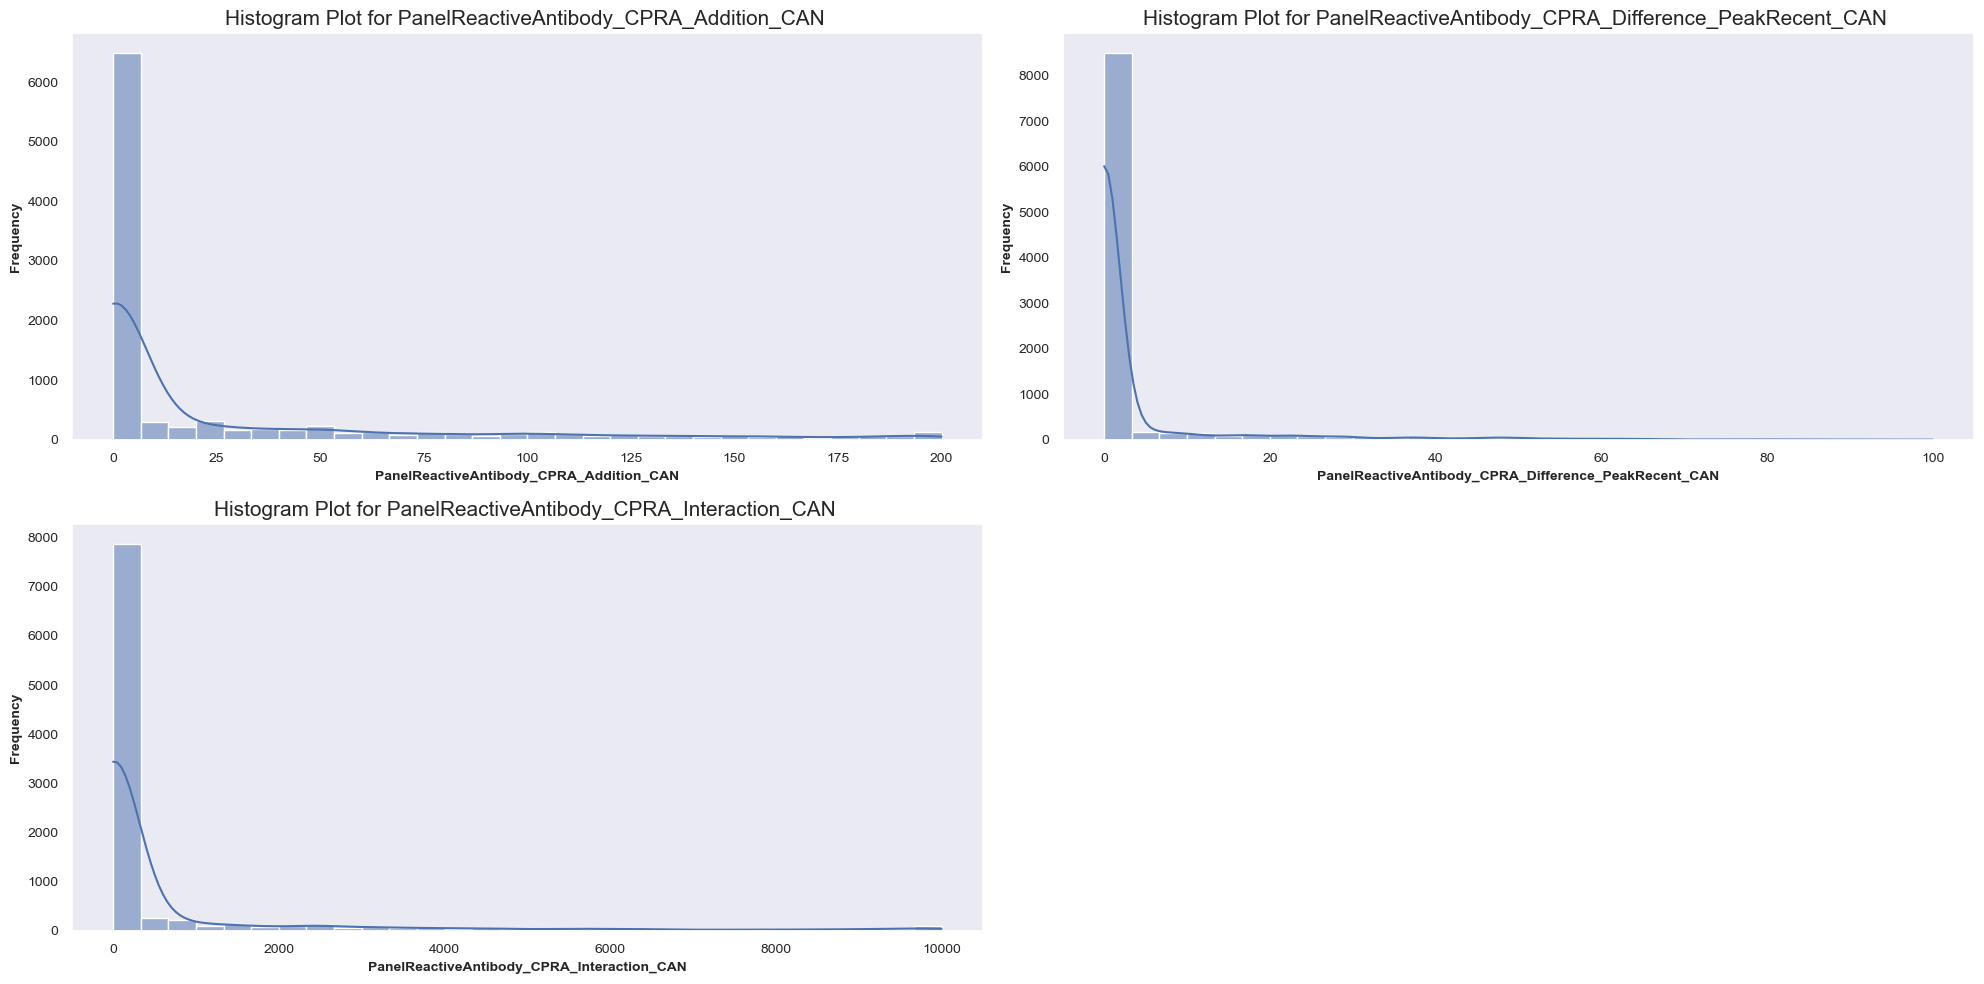

In [27]:
# plots
uv.histogramPlot(df, features, bins=30)

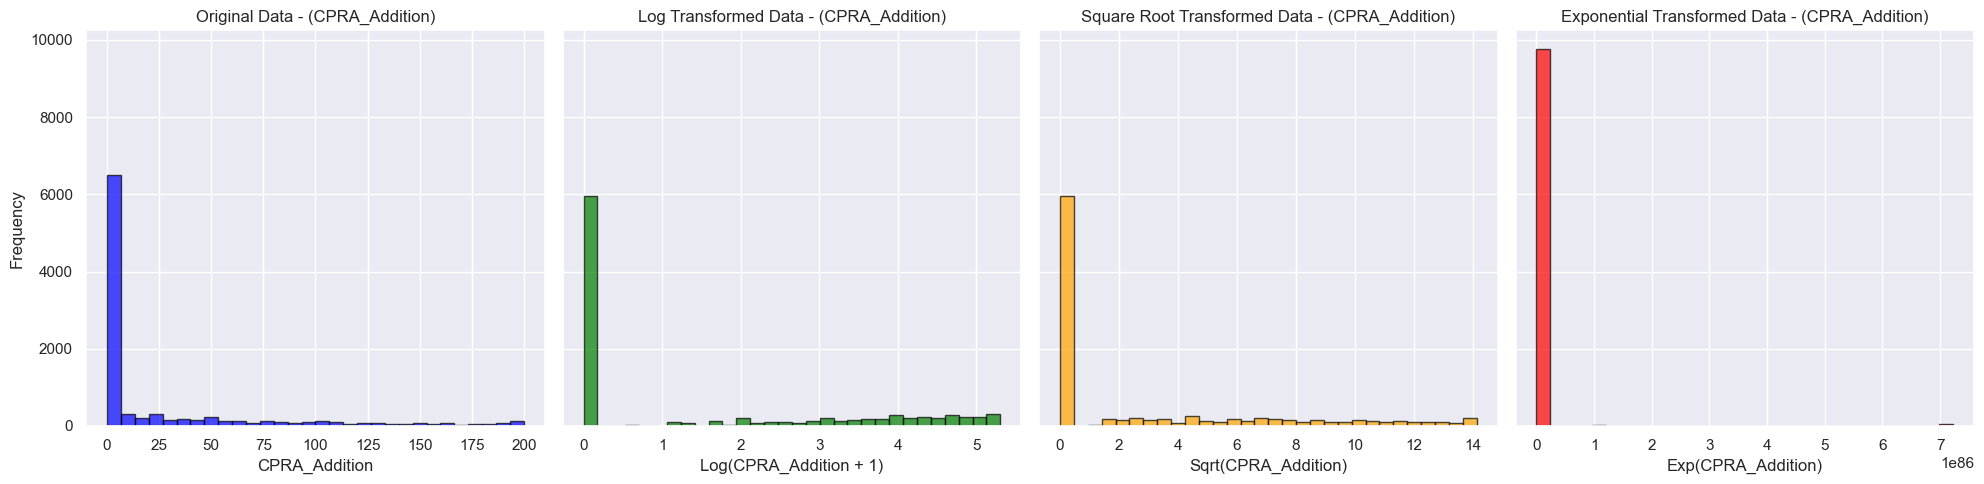

In [28]:
uv.transformPlots(df.PanelReactiveAntibody_CPRA_Addition_CAN, txt='CPRA_Addition')

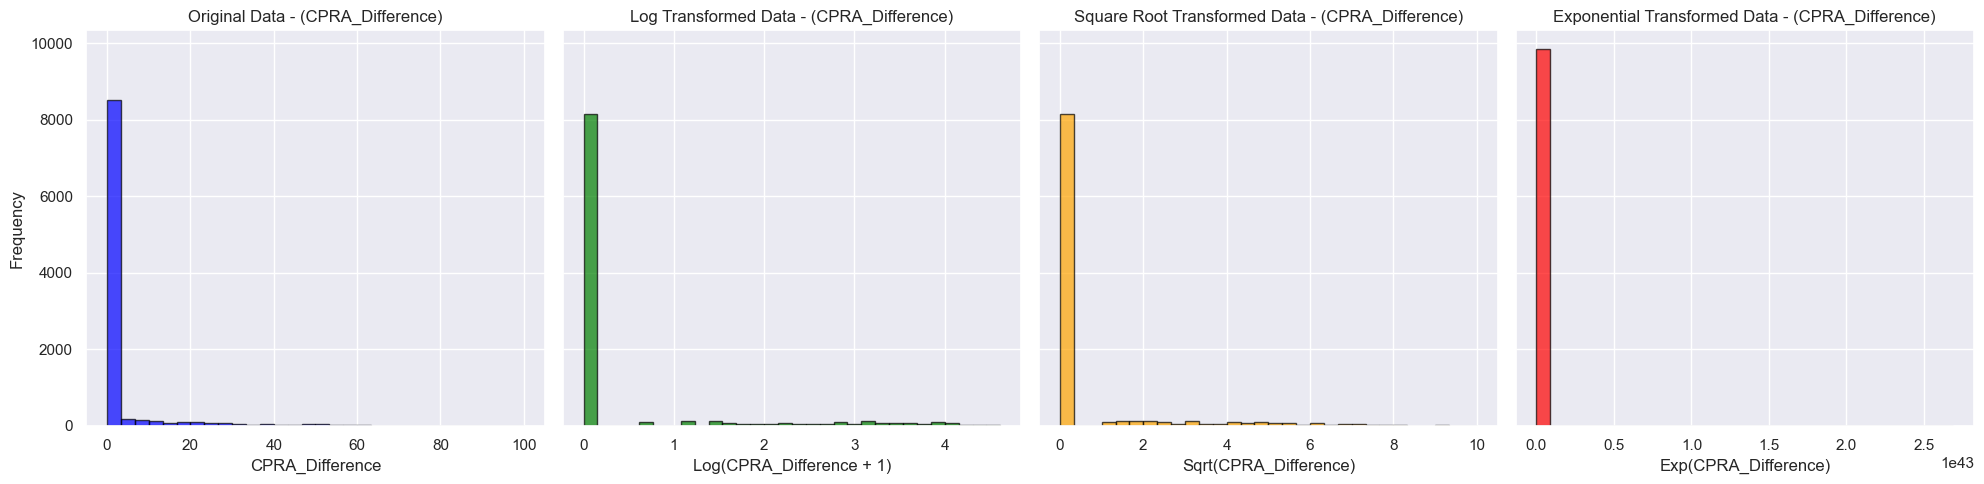

In [29]:
uv.transformPlots(df.PanelReactiveAntibody_CPRA_Difference_PeakRecent_CAN, txt='CPRA_Difference')

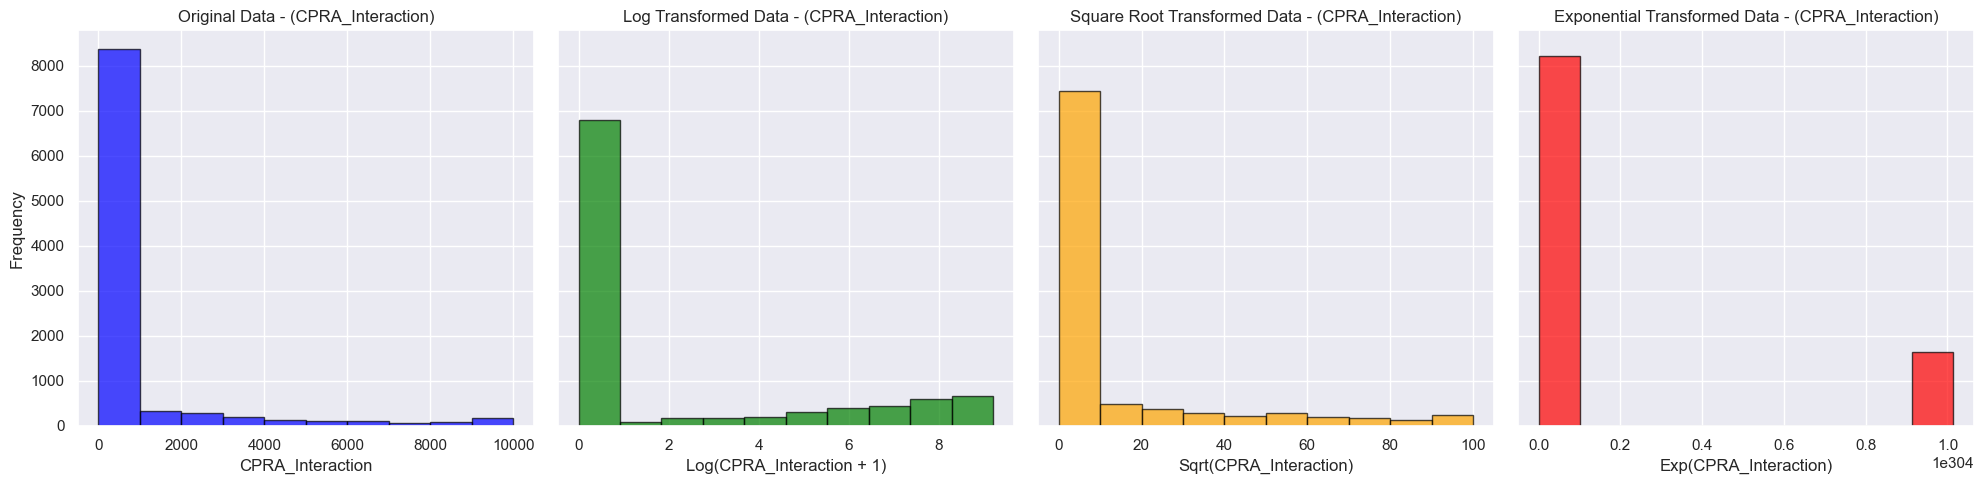

In [30]:
uv.transformPlots(df.PanelReactiveAntibody_CPRA_Interaction_CAN, txt='CPRA_Interaction', bins=10)

##### There is no transformation due to the lack of differences in the features after transformation.

#### Creatinine

In [31]:
# examine features
features = getFeatureList(df, 'Creatinine')

                               count      mean       std      min   25%     50%   75%       max
Creatinine_Addition_CAN       9850.0  2.785284  1.907786   0.3500  1.98  2.4000  3.00   45.5600
Creatinine_Difference_RT_CAN  9850.0  0.007662  0.735648 -22.3000 -0.18  0.0000  0.18   18.9600
Creatinine_Interaction_CAN    9850.0  2.713977  9.738804   0.0294  0.96  1.4374  2.21  510.5184

:::: NaN Count:
Creatinine_Addition_CAN         0
Creatinine_Difference_RT_CAN    0
Creatinine_Interaction_CAN      0


In [32]:
df[features].corr()

,Creatinine_Addition_CAN,Creatinine_Difference_RT_CAN,Creatinine_Interaction_CAN
Creatinine_Addition_CAN,1.000000,0.025477,0.846276
Creatinine_Difference_RT_CAN,0.025477,1.000000,0.000433
Creatinine_Interaction_CAN,0.846276,0.000433,1.000000


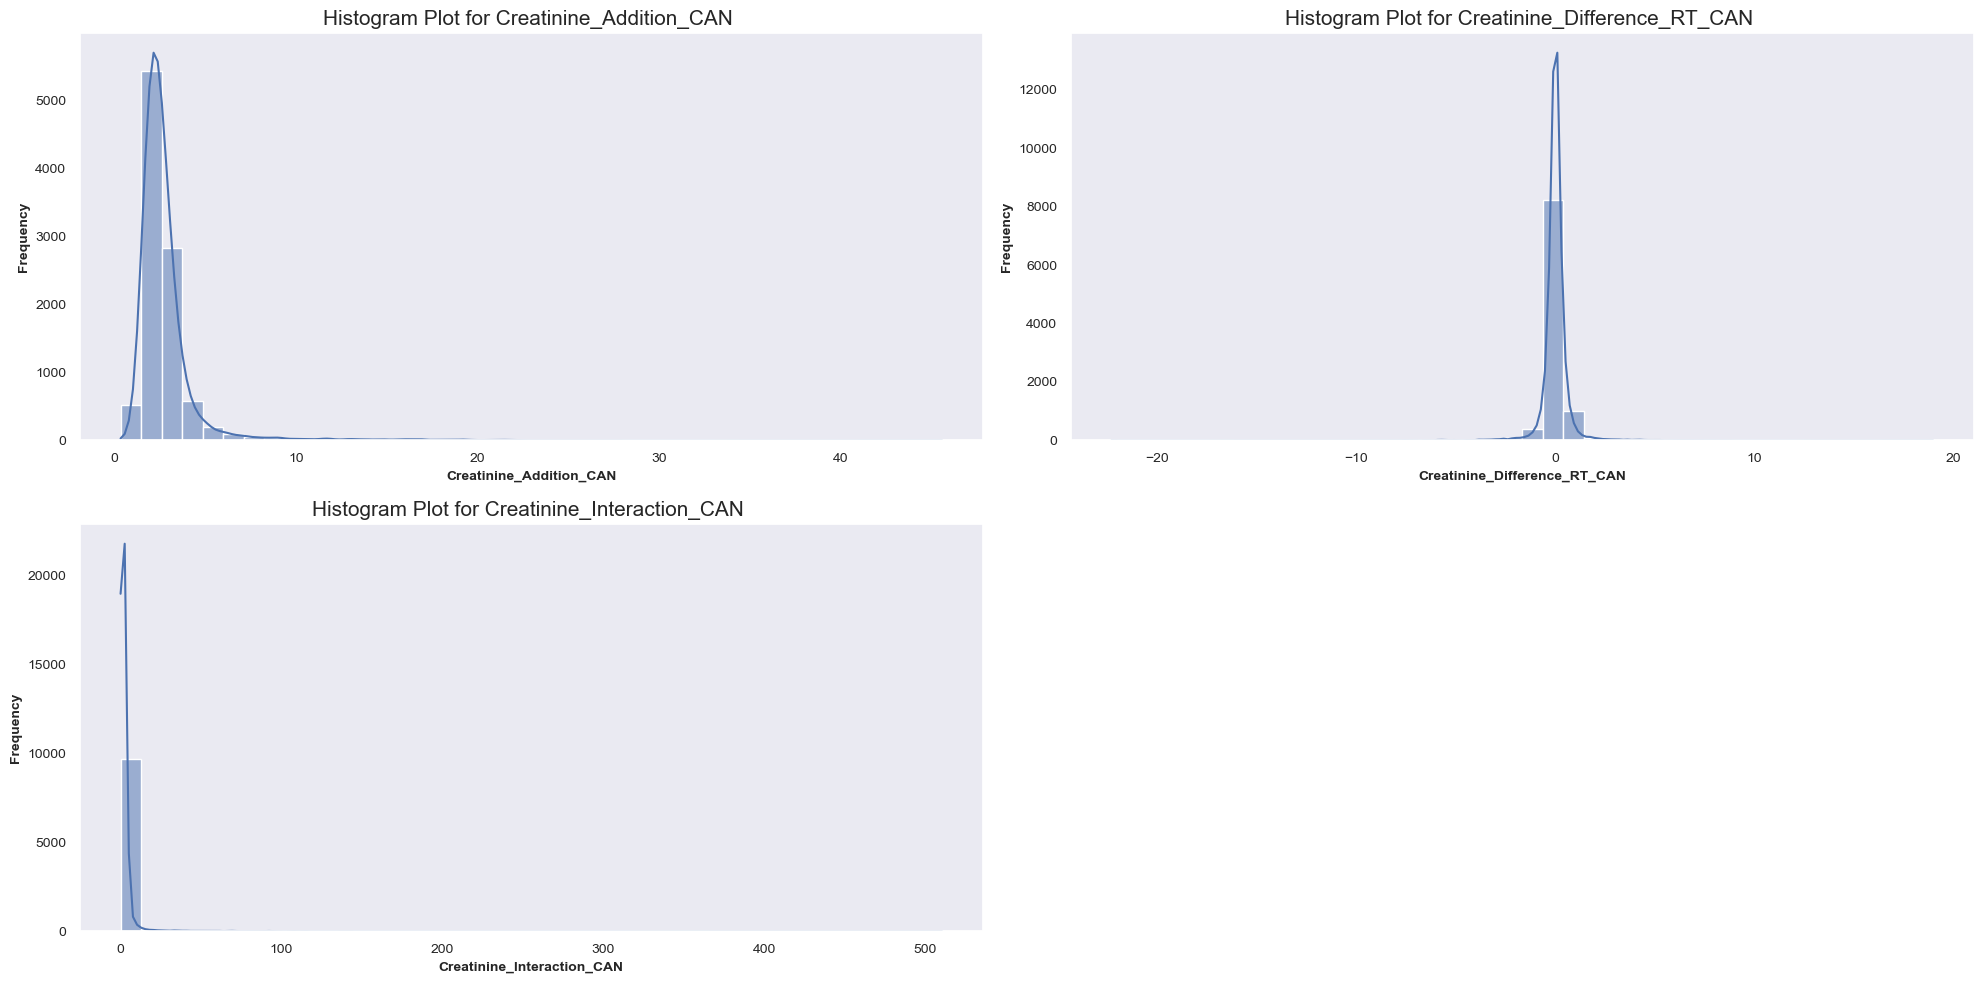

In [33]:
# plots
uv.histogramPlot(df, features, bins=40)

In [43]:
import scipy.stats as stats


def plot_qq(data, features_list):
    """
    Generate Q-Q plots for multiple features in a dataset.

    Parameters:
    data : pandas.DataFrame
        The dataset containing the features to be plotted.
    features_list : list of str
        A list of column names in `data` for which Q-Q plots are to be generated.

    Returns:
    None
        Displays Q-Q plots for the specified features.
    """
    # Calculate the number of rows needed for subplots
    n_rows = (len(features_list) + 1) // 2  # Two plots per row

    # Create subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(16, 4 * n_rows))
    fig.suptitle("Q-Q Plots", fontsize=fontsize)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Generate Q-Q plots
    for ax, feature in zip(axes, features_list):
        stats.probplot(data[feature].dropna(), dist="norm", plot=ax)
        ax.set_title(f"Q-Q Plot: {feature}")

    # Remove any unused subplots
    for ax in axes[len(features_list):]:
        fig.delaxes(ax)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the main title
    plt.show()



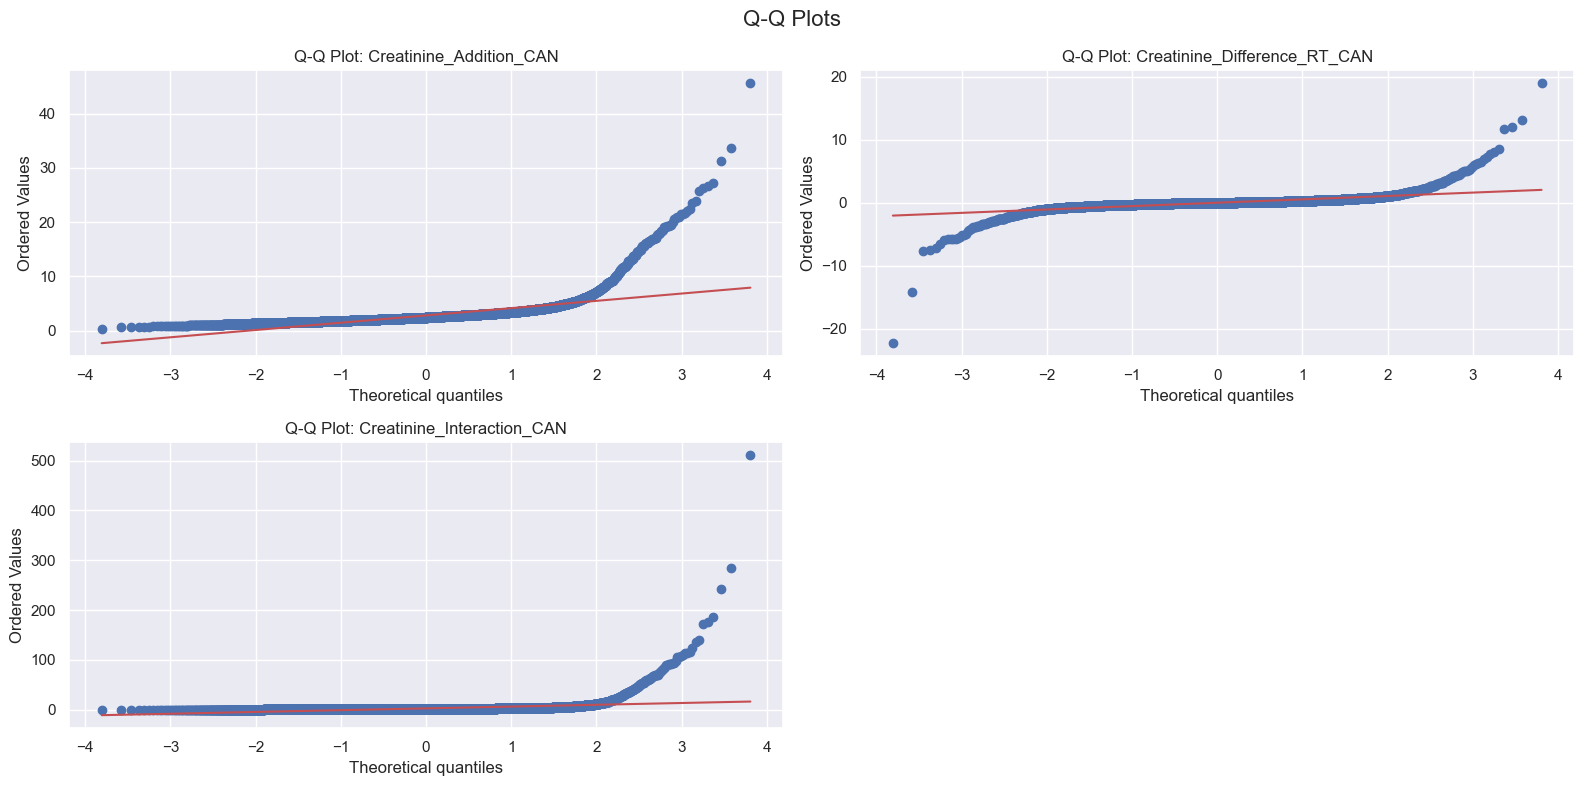

In [44]:
plotQQ(df,features)

### Save

In [34]:
# # heart dataset
# uf.writeToFile(df, 'Heart_ML_DropNaNs',path='../Data/', format='pkl')

# # heart label
# uf.writeToFile(df_label, 'Label_ML',path='../Data/', format='pkl')

# # heart candidate
# uf.writeToFile(df_can, 'CAN_ML', format='pkl')

# # heart donor
# uf.writeToFile(df_don, 'DON_ML', format='pkl')

# # heart both
# uf.writeToFile(df_both, 'BOTH_ML', format='pkl')

# # heart nominal
# uf.writeToFile(df_nominal, 'Nominal_ML', format='pkl')

# # heart ordinal
# uf.writeToFile(df_ordinal, 'Ordinal_ML', format='pkl')

# # heart numeric
# uf.writeToFile(df_numeric, 'Numeric_ML', format='pkl')

# # heart drop
# uf.writeToFile(df_drop, 'Drop_ML', format='pkl')

# # heart new
# uf.writeToFile(df_new, 'New_ML', format='pkl')

# # heart object
# uf.writeToFile(df_object, 'Object_ML', format='pkl')

# # heart unknown
# uf.writeToFile(df_unknown, 'Unknown_ML', format='pkl')

# # heart date
# uf.writeToFile(df_date, 'Date_ML', format='pkl')

# # heart data dictionary
# uf.writeToFile(df_dict, 'Dictionary_ML', format='pkl')

9,850 records written to ../Data/Heart_ML_DropNaNs.pkl
